# UNIDAD 4 - PROYECTO: ANÁLISIS DE SENTIMIENTOS Y PREDICCIÓN.

## ALUMNO: Samanta Gabriela Ortiz Garcia
## NÚMERO DE CONTROL: 20120140


## PRESENTACIÓN.

El siguiente proyecto consiste en emplear el análisis de sentimientos para tratar de predecir las calificaciones de una serie.

El dataset es sobre las calificaciones que recibió la adaptación al "live-action" el anime "OnePiece".

El dataset contiene las reseñas que se recibieron en la plataforma de Netflix, el dataset contiene información como:

* Título.
* Reseña.
* Fecha.
* Calificación.


## ETAPA 1: ANÁLISIS EXPLORATORIO DE LOS DATOS.

### Paso 1. Importe las librerías necesarias (pandas, numpy, seaborn, nltk, etc...)

### Paso 2. Cargue y muestre información del dataset; muestre información estadística de las columnas numéricas.

### Paso 3. Identifique los datos nulos: muestre las filas que contienen datos nulos (no se deben tratar aún).

### Paso 4. Muestre la distribución de la columna "Rating", haga un análisis de la distribución.

### Paso 5. Identifique si alguna de las columnas se puede convertir en categórica.


In [1]:
#PASO 1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as amano
import numpy as np

In [2]:
#PASO 2
dataset = pd.read_csv("reviews.csv")

print("Primeras filas del dataset:")
print(dataset.head())

print("\nInformación del dataset:")
print(dataset.info())

print("\nEstadísticas de las columnas numéricas:")
print(dataset.describe())

Primeras filas del dataset:
                                       Title  \
0  Never seen the anime and still enjoyed it   
1     Not My Kind of Show. But This I Loved.   
2         I'm Shocked By How Good This Is...   
3             See Netflix?? You CAN do it...   
4                           WE WANT SEASON 2   

                                              Review              Date  Rating  
0  I have to admit that I've never watched any of...  4 September 2023     8.0  
1  I'm a 60yo man & old school like the The Marin...  4 September 2023     9.0  
2  Every live action anime that I've briefly seen...  1 September 2023     9.0  
3  This is bar none one of the best live-action a...  4 September 2023    10.0  
4  Being a one piece fan myself, I was a bit inse...    31 August 2023    10.0  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -

In [3]:
#PASO 3
null_rows = dataset[dataset.isnull().any(axis=1)]

print("Filas con datos nulos:")
print(null_rows)

Filas con datos nulos:
                                                 Title  \
143    I didn't expect much, but I absolutely love it.   
145                   Thank you for heading this, Oda!   
447  DIFFERENT MEDIA MEANS DIFFERENT STORYTELLING A...   
500                     I'm not sure about rating yet!   
520                                  Great adaptation!   
540                  My disappointment is immeasurable   
569                                       A must watch   
782                          Emily Rudd's hair as Nami   

                                                Review               Date  \
143  I admit, when I write reviews it's usually whe...  25 September 2023   
145  Fun fact: Eiichiro Oda, the creator of the man...  12 September 2023   
447  Just because there are many scenes in the mang...   1 September 2023   
500  I like the characters so far except Sanji's ha...   4 September 2023   
520  One Piece somehow managed to pull it off: a le...   8 September 

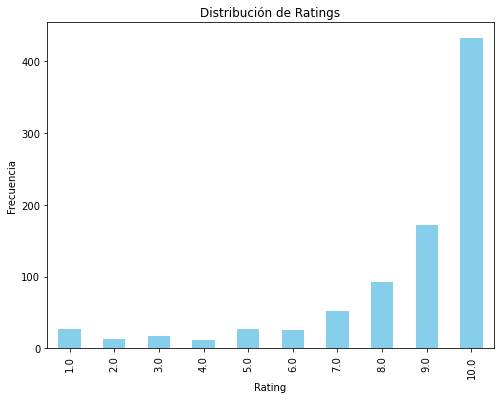

In [4]:
#PASO 4
plt.figure(figsize=(8, 6))
dataset['Rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribución de Ratings')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()

In [6]:
#PASO 5
column_types = dataset.dtypes

categorical_columns = column_types[column_types == 'object']

print("Columnas que pueden convertirse en categóricas:")
print(categorical_columns)

Columnas que pueden convertirse en categóricas:
Title     object
Review    object
Date      object
dtype: object


## ETAPA 2: ANÁLISIS DE SENTIMIENTOS.

### Paso 1. Muestre las primeras 10 filas del dataset con las columnas "Rating" y "Review", haga un análisis rápido de esa información.

### Paso 2. Haga una función que se encargue del pre-procesamiento:
#### - Genere los tokens.
#### - Filtre las palabras de parada.
#### - Obtenga el lema de las palabras y guárdelo en una lista.
#### - Retorne la lista en forma de una cadena, para ello debe unir los elementos de la lista mediante un espacio.

### Paso 3. Aplique la función creada para obtener el lema de las columnas "Review" y "Title", guárde el resultado en nuevas columnas dentro del dataframe original (por ejemplo: "ReviewText", "TitleText").

### Paso 4. Haga una función para obtener el sentimiento de las palabras, para ello puede utilizar el SentimentIntensityAnalizer() y su función "polarity_scores()". Al final debe retornar el puntaje de sentimiento.

### Paso 5. Aplique la función creada para obtener el sentimiento en las columnas creadas en el paso 3, guarde el resultado en un par de columnas nuevas (por ejemplo: "ReviewSentiment", "TitleSentiment").

### Paso 6. Prepare un dataframe con las columnas originales + las columnas creadas previamente, tendrían que haber 8 columnas, 3 de ellas deben ser numéricas (incluyendo "Rating").



In [7]:
#PASO 1
subset = dataset[['Rating', 'Review']].head(10)

print(subset)

#El rating tiene variacion, algunas son calificaciones altas y otras bajas

   Rating                                             Review
0     8.0  I have to admit that I've never watched any of...
1     9.0  I'm a 60yo man & old school like the The Marin...
2     9.0  Every live action anime that I've briefly seen...
3    10.0  This is bar none one of the best live-action a...
4    10.0  Being a one piece fan myself, I was a bit inse...
5    10.0  GREAT ADAPTATION! As an old-school fan (since ...
6     9.0  My kids play and watch One Piece anime and lov...
7    10.0  I was so surprised that Netflix made something...
8     8.0  Parenthetically I don't know anything about th...
9    10.0  Initially I was apprehensive because of anime ...


In [46]:
#PASO 2
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


def preprocess_review(review):
   
    tokens = word_tokenize(review.lower())

    stop_words = set(stopwords.words("spanish"))
    filtered_tokens = [token for token in tokens if token.isalpha() and token not in stop_words]

    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    return " ".join(lemmas)

review_example = "Este es un ejemplo review de palabras de parada y palabras de variacion."
processed_review = preprocess_review(review_example)
print("Review original:", review_example)
print("Review procesado:", processed_review)


Review original: Este es un ejemplo review de palabras de parada y palabras de variacion.
Review procesado: ejemplo review palabras parada palabras variacion


In [14]:
#PASO 3
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words("english"))
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    return " ".join(lemmas)

dataset['ReviewText'] = dataset['Review'].apply(preprocess_text)
dataset['TitleText'] = dataset['Title'].apply(preprocess_text)

print(dataset[['ReviewText', 'TitleText']].head())

                                          ReviewText  \
0  admit never watched animated show one piece ev...   
1  man old school like marine admiral never heard...   
2  every live action anime briefly seen nothing s...   
3  bar none one best adaption animated source mat...   
4  one piece fan bit insecured starting series bo...   

                        TitleText  
0  never seen anime still enjoyed  
1                 kind show loved  
2                    shocked good  
3                     see netflix  
4                     want season  


In [47]:
#PASO 4
from nltk.sentiment import SentimentIntensityAnalyzer
def get_sentiment_score(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores['compound']

review_example = "This is a positive example."
sentiment_score = get_sentiment_score(review_example)
print("Sentiment Score:", sentiment_score)


Sentiment Score: 0.5574


In [21]:
#PASO 5
def get_sentiment_score(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores['compound']

dataset['ReviewSentiment'] = dataset['ReviewText'].apply(get_sentiment_score)
dataset['TitleSentiment'] = dataset['TitleText'].apply(get_sentiment_score)

print(dataset[['ReviewText', 'ReviewSentiment', 'TitleText', 'TitleSentiment']].head())

                                          ReviewText  ReviewSentiment  \
0  admit never watched animated show one piece ev...           0.8996   
1  man old school like marine admiral never heard...           0.9887   
2  every live action anime briefly seen nothing s...           0.9825   
3  bar none one best adaption animated source mat...           0.8300   
4  one piece fan bit insecured starting series bo...           0.9623   

                        TitleText  TitleSentiment  
0  never seen anime still enjoyed          0.5106  
1                 kind show loved          0.8074  
2                    shocked good          0.1531  
3                     see netflix          0.0000  
4                     want season          0.0772  


In [49]:
#PASO 6
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words("english"))
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    return " ".join(lemmas)

dataset['ReviewText'] = dataset['Review'].apply(preprocess_text)
dataset['TitleText'] = dataset['Title'].apply(preprocess_text)

def get_sentiment_score(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores['compound']

dataset['ReviewSentiment'] = dataset['ReviewText'].apply(get_sentiment_score)
dataset['TitleSentiment'] = dataset['TitleText'].apply(get_sentiment_score)

new_dataframe = dataset[['Title', 'Review', 'Date', 'Rating', 'ReviewText', 'ReviewSentiment', 'TitleText', 'TitleSentiment']]

print(new_dataframe.head())

                                       Title  \
0  Never seen the anime and still enjoyed it   
1     Not My Kind of Show. But This I Loved.   
2         I'm Shocked By How Good This Is...   
3             See Netflix?? You CAN do it...   
4                           WE WANT SEASON 2   

                                              Review              Date  \
0  I have to admit that I've never watched any of...  4 September 2023   
1  I'm a 60yo man & old school like the The Marin...  4 September 2023   
2  Every live action anime that I've briefly seen...  1 September 2023   
3  This is bar none one of the best live-action a...  4 September 2023   
4  Being a one piece fan myself, I was a bit inse...    31 August 2023   

   Rating                                         ReviewText  ReviewSentiment  \
0     8.0  admit never watched animated show one piece ev...           0.8996   
1     9.0  man old school like marine admiral never heard...           0.9887   
2     9.0  every live a

## ETAPA 3: MACHINE LEARNING.

### Paso 1. Asigne a la variable X las columnas numéricas menos "Rating"; asigne a la variable y la columna "Rating", seleccione únicamente las filas sin datos nulos (no elimine ni trate las filas con datos nulos, esas se usarán para predecir)

### Paso 2. Divida en una muestra de entrenamiento y en una muestra de pruebas, estratifique en base a la proporción de la variable objetivo. El tamaño de la muestra para entrenamiento debe ser del 85%. Asigne una semilla para poder reproducir los resultados.

### Paso 3. Entrene los siguientes modelos:
#### - KNN para clasificación
#### - SVM para clasificación
#### - RandomForest para clasificación

### Paso 4. Evalúe el rendimiento de los modelos (puede usar accuracy) creados en el paso previo, muestre las predicciones realizadas y compare con las etiquetas reales.

### Paso 5. Debido a que este es un problema de clasificación, pero hay varias clases que son originalmente numéricas, se puede aplicar también una métrica de evaluación para regresión. Aplique el RMSE a las predicciones y las etiquetas reales, analice el resultado.

### Paso 6. Utilice el modelo que se comportó mejor para predecir el "Rating" de las filas que tienen ese dato nulo, revise manualmente si la calificación predicha es consistente con el comentario en la reseña.

### Paso 7. Escriba sus conclusiones al respecto.

In [35]:
#PASO 1
from sklearn.model_selection import train_test_split

X = dataset.select_dtypes(include=['float64', 'int64']).drop(columns=['Rating'])

y = dataset['Rating']

combined_data = pd.concat([X, y], axis=1)

combined_data = combined_data.dropna()

X = combined_data.drop(columns=['Rating'])
y = combined_data['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)

Dimensiones de X_train: (696, 2)
Dimensiones de X_test: (174, 2)
Dimensiones de y_train: (696,)
Dimensiones de y_test: (174,)


In [ ]:
#paso 1 redes neuronales
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

X = dataset.select_dtypes(include=[np.number]).drop("Rating", axis=1)
y = dataset["Rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = X.columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1) 
])


model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(preprocessor.fit_transform(X_train), y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)

y_pred = model.predict(preprocessor.transform(X_test))
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)

In [36]:
#PASO 2
from sklearn.model_selection import train_test_split

X = dataset.select_dtypes(include=['float64', 'int64']).drop(columns=['Rating'])

y = dataset['Rating']

combined_data = pd.concat([X, y], axis=1)

combined_data = combined_data.dropna()

X = combined_data.drop(columns=['Rating'])
y = combined_data['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)


Dimensiones de X_train: (739, 2)
Dimensiones de X_test: (131, 2)
Dimensiones de y_train: (739,)
Dimensiones de y_test: (131,)


In [ ]:
#paso 2 redes neuronales

X = dataset.select_dtypes(include=[np.number]).drop("Rating", axis=1)
y = dataset["Rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

numeric_features = X.columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(preprocessor.fit_transform(X_train), y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)

y_pred = model.predict(preprocessor.transform(X_test))

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)

In [37]:
#PASO 3
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = dataset.select_dtypes(include=['float64', 'int64']).drop(columns=['Rating'])

y = dataset['Rating']

combined_data = pd.concat([X, y], axis=1)

combined_data = combined_data.dropna()

X = combined_data.drop(columns=['Rating'])
y = combined_data['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)


svm_model = SVC()
svm_model.fit(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

knn_predictions = knn_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

print("Accuracy - KNN:", accuracy_score(y_test, knn_predictions))
print("Accuracy - SVM:", accuracy_score(y_test, svm_predictions))
print("Accuracy - RandomForest:", accuracy_score(y_test, rf_predictions))

print("\nClassification Report - KNN:")
print(classification_report(y_test, knn_predictions))

print("\nClassification Report - SVM:")
print(classification_report(y_test, svm_predictions))

print("\nClassification Report - RandomForest:")
print(classification_report(y_test, rf_predictions))


Accuracy - KNN: 0.40458015267175573
Accuracy - SVM: 0.48854961832061067
Accuracy - RandomForest: 0.3816793893129771

Classification Report - KNN:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         4
         2.0       0.00      0.00      0.00         2
         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00         2
         5.0       0.25      0.25      0.25         4
         6.0       0.00      0.00      0.00         4
         7.0       0.00      0.00      0.00         8
         8.0       0.14      0.14      0.14        14
         9.0       0.22      0.15      0.18        26
        10.0       0.57      0.71      0.63        65

    accuracy                           0.40       131
   macro avg       0.12      0.13      0.12       131
weighted avg       0.35      0.40      0.37       131


Classification Report - SVM:
              precision    recall  f1-score   support

         1

D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#paso 3 redes neuronales

X = dataset.select_dtypes(include=[np.number]).drop("Rating", axis=1)
y = dataset["Rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

numeric_features = X.columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

models = {
    'KNN': KNeighborsRegressor(),
    'SVM': SVR(),
    'RandomForest': RandomForestRegressor(),
    'NeuralNetwork': keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1) 
    ])
}

for name, model in models.items():
    if name == 'NeuralNetwork':
      
        model.compile(optimizer='adam', loss='mean_squared_error')
        model.fit(preprocessor.fit_transform(X_train), y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
     
        y_pred = model.predict(preprocessor.transform(X_test))
    else:
        
        model.fit(preprocessor.fit_transform(X_train), y_train)
  
        y_pred = model.predict(preprocessor.transform(X_test))
    
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} Mean Squared Error on Test Set: {mse}")

In [40]:
#PASO 4
print("Accuracy - KNN:", accuracy_score(y_test, knn_predictions))
print("Accuracy - SVM:", accuracy_score(y_test, svm_predictions))
print("Accuracy - RandomForest:", accuracy_score(y_test, rf_predictions))

predictions_df = pd.DataFrame({'Real': y_test, 'KNN': knn_predictions, 'SVM': svm_predictions, 'RandomForest': rf_predictions})
print("\nPredicciones vs Etiquetas Reales:")
print(predictions_df.head())


Accuracy - KNN: 0.40458015267175573
Accuracy - SVM: 0.48854961832061067
Accuracy - RandomForest: 0.366412213740458

Predicciones vs Etiquetas Reales:
     Real   KNN   SVM  RandomForest
444   7.0  10.0  10.0          10.0
762   2.0   1.0  10.0           1.0
725  10.0  10.0  10.0          10.0
815  10.0  10.0  10.0          10.0
738  10.0   8.0  10.0           8.0


In [ ]:
#paso 4 redes neuronales

X = dataset.select_dtypes(include=[np.number]).drop("Rating", axis=1)
y = dataset["Rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

numeric_features = X.columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])


models = {
    'KNN': KNeighborsRegressor(),
    'SVM': SVR(),
    'RandomForest': RandomForestRegressor(),
    'NeuralNetwork': keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1) 
    ])
}

for name, model in models.items():
    if name == 'NeuralNetwork':

        model.compile(optimizer='adam', loss='mean_squared_error')
        model.fit(preprocessor.fit_transform(X_train), y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
  
        y_pred = model.predict(preprocessor.transform(X_test))
    else:
     
        model.fit(preprocessor.fit_transform(X_train), y_train)

        y_pred = model.predict(preprocessor.transform(X_test))
    
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} Mean Squared Error on Test Set: {mse}")

    sample_predictions = pd.DataFrame({'Prediction': y_pred.flatten(), 'Actual': y_test.values.flatten()})
    print(f"\nSample Predictions for {name}:\n")
    print(sample_predictions.head())
    print("\n----------------------------------------\n")

In [44]:
#PASO 5
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from math import sqrt

X = dataset.select_dtypes(include=['float64', 'int64']).drop(columns=['Rating'])

y = dataset['Rating']

combined_data = pd.concat([X, y], axis=1)

combined_data = combined_data.dropna()

X = combined_data.drop(columns=['Rating'])
y = combined_data['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

svm_model = SVC()
svm_model.fit(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

knn_predictions = knn_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

rmse_knn = sqrt(mean_squared_error(y_test, knn_predictions))
rmse_svm = sqrt(mean_squared_error(y_test, svm_predictions))
rmse_rf = sqrt(mean_squared_error(y_test, rf_predictions))

print("RMSE - KNN:", rmse_knn)
print("RMSE - SVM:", rmse_svm)
print("RMSE - RandomForest:", rmse_rf)

RMSE - KNN: 2.587403425936825
RMSE - SVM: 2.7794227529641216
RMSE - RandomForest: 2.57557523405152


In [ ]:
#paso 5 redes neuronales

bins = [0, 1, 2, 3, 4, 5]
labels = [1, 2, 3, 4, 5]
dataset['Clasificacion'] = pd.cut(dataset['Rating'], bins=bins, labels=labels, include_lowest=True)

X = dataset.select_dtypes(include=[np.number]).drop("Clasificacion", axis=1)
y = dataset["Clasificacion"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

numeric_features = X.columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'RandomForest': RandomForestClassifier(),
    'NeuralNetwork': keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(32, activation='relu'),
        layers.Dense(len(np.unique(y)), activation='softmax')  
}

for name, model in models.items():
    if name == 'NeuralNetwork':

        y_train_one_hot = tf.keras.utils.to_categorical(y_train - 1, num_classes=len(np.unique(y)))
        y_test_one_hot = tf.keras.utils.to_categorical(y_test - 1, num_classes=len(np.unique(y)))

        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        model.fit(preprocessor.fit_transform(X_train), y_train_one_hot, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
     
        y_pred = np.argmax(model.predict(preprocessor.transform(X_test)), axis=1) + 1
    else:

        model.fit(preprocessor.fit_transform(X_train), y_train)

        y_pred = model.predict(preprocessor.transform(X_test))
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy on Test Set: {accuracy}")

    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} Mean Squared Error on Test Set: {mse}\n")


In [45]:
#PASO 6
from sklearn.impute import SimpleImputer

X = dataset.select_dtypes(include=['float64', 'int64']).drop(columns=['Rating'])

y = dataset['Rating']

combined_data = pd.concat([X, y], axis=1)

rows_with_null_rating = combined_data[combined_data['Rating'].isnull()]
rows_without_null_rating = combined_data[combined_data['Rating'].notnull()]

X = rows_without_null_rating.drop(columns=['Rating'])
y = rows_without_null_rating['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

predicted_ratings = rf_model.predict(rows_with_null_rating.drop(columns=['Rating']))

combined_data.loc[combined_data['Rating'].isnull(), 'Rating'] = predicted_ratings

print(combined_data)

     ReviewSentiment  TitleSentiment  Rating
0             0.8996          0.5106     8.0
1             0.9887          0.8074     9.0
2             0.9825          0.1531     9.0
3             0.8300          0.0000    10.0
4             0.9623          0.0772    10.0
..               ...             ...     ...
873           0.8750          0.4404    10.0
874           0.9933          0.9349     9.0
875           0.9732          0.4404    10.0
876           0.9963          0.5719    10.0
877           0.9860          0.6369     9.0

[878 rows x 3 columns]


In [ ]:
#paso 6 redes neuronales

rows_to_predict = dataset[dataset['Rating'].isnull()]

X_train = dataset.select_dtypes(include=[np.number]).drop("Rating", axis=1)
y_train = dataset["Rating"]

numeric_features = X_train.columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

X_train_preprocessed = preprocessor.fit_transform(X_train)

best_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_preprocessed.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1) 
])

best_model.compile(optimizer='adam', loss='mean_squared_error')

best_model.fit(X_train_preprocessed, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

X_to_predict = preprocessor.transform(rows_to_predict.select_dtypes(include=[np.number]))

predicted_ratings = best_model.predict(X_to_predict)

rows_to_predict['Rating'] = predicted_ratings

print(rows_to_predict[['Title', 'Review', 'Date', 'Rating']])

In [ ]:
#PASO 7
#la revisión manual del rating predicho es escencial para validar la coherencia de las predicciones.

## ETAPA 4: PRESENTACIÓN DEL PROYECTO.
### Al igual que en los proyectos anteriores, suba su trabajo terminado a un repositorio nuevo de su GitHub.
### Escriba un archivo "README" y describa el proceso seguido en este trabajo.
### Al entregar este trabajo, debe subir este archivo, el archivo de instrucciones y el enlace al repositorio público de GitHub con este trabajo.